# Importing libraries

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error , median_absolute_error
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

# load Data


In [3]:
df = pd.read_csv(r'/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Exploration and Cleaning


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
181,Hero Splender Plus,2016,0.30,0.48,50000,Petrol,Individual,Manual,0
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


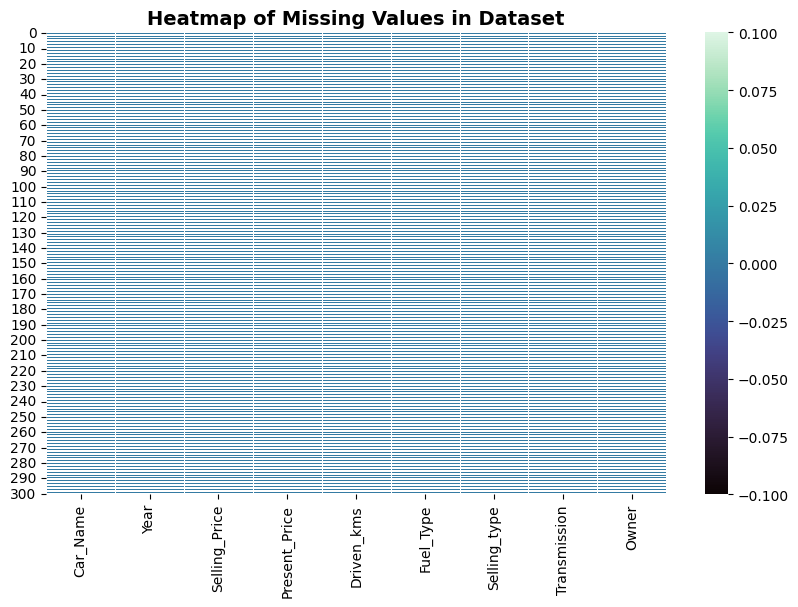

In [11]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(),
            cmap="mako",
            cbar=True,
            linecolor='white',
            linewidths=0.5,
            annot=False)

plt.title("Heatmap of Missing Values in Dataset", fontsize=14, fontweight='bold')

plt.show()

In [14]:
df.duplicated().sum()

np.int64(2)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [21]:
numeric_df = df.select_dtypes(include=[np.number])

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

Year: 7 outliers
Selling_Price: 16 outliers
Present_Price: 14 outliers
Driven_kms: 8 outliers
Owner: 11 outliers


In [24]:
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

print("Outliers have been replaced with median.")

Outliers have been replaced with median.


# Data Analysis

/tmp/ipython-input-29-3313038913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='mako')


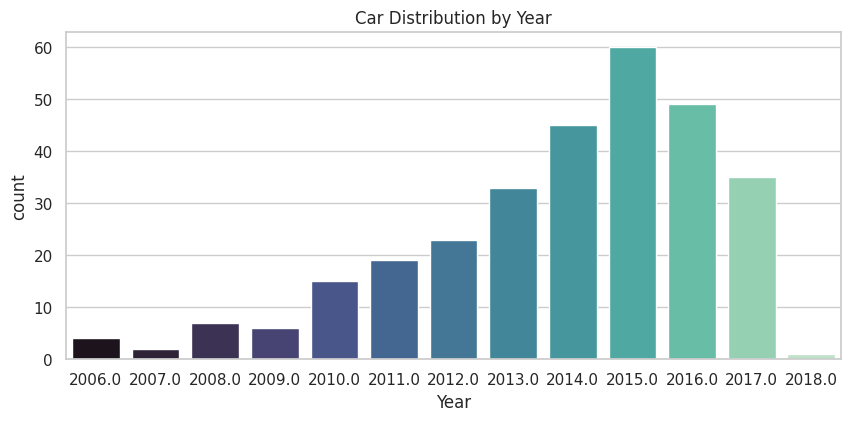

In [29]:
plt.figure(figsize=(22, 40))
plt.subplot(8, 2, 1)
sns.countplot(data=df, x='Year', palette='mako')
plt.title('Car Distribution by Year')

Text(0.5, 1.0, 'Selling Price Distribution')

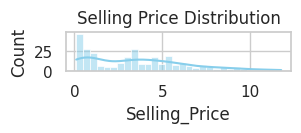

In [30]:
plt.subplot(8, 2, 2)
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='skyblue')
plt.title('Selling Price Distribution')

Text(0.5, 1.0, 'Present Price Distribution')

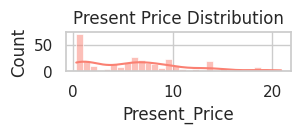

In [31]:
plt.subplot(8, 2, 3)
sns.histplot(df['Present_Price'], bins=30, kde=True, color='salmon')
plt.title('Present Price Distribution')

Text(0.5, 1.0, 'Driven Kilometers Distribution')

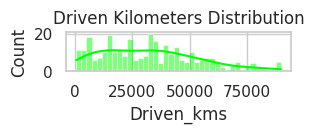

In [32]:
plt.subplot(8, 2, 4)
sns.histplot(df['Driven_kms'], bins=40, kde=True, color='lime')
plt.title('Driven Kilometers Distribution')

/tmp/ipython-input-33-2887893864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', palette='rocket')


Text(0.5, 1.0, 'Fuel Type Distribution')

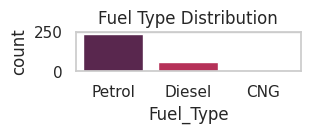

In [33]:
plt.subplot(8, 2, 5)
sns.countplot(data=df, x='Fuel_Type', palette='rocket')
plt.title('Fuel Type Distribution')

/tmp/ipython-input-34-2863348269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Selling_type', palette='viridis')


Text(0.5, 1.0, 'Selling Type Count')

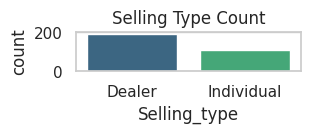

In [34]:
plt.subplot(8, 2, 6)
sns.countplot(data=df, x='Selling_type', palette='viridis')
plt.title('Selling Type Count')

/tmp/ipython-input-35-1119304722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transmission', palette='crest')


Text(0.5, 1.0, 'Transmission Type Count')

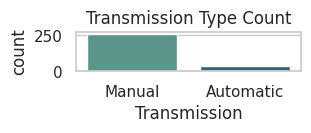

In [35]:
plt.subplot(8, 2, 7)
sns.countplot(data=df, x='Transmission', palette='crest')
plt.title('Transmission Type Count')

/tmp/ipython-input-36-4166572742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner', palette='icefire')


Text(0.5, 1.0, 'Number of Previous Owners')

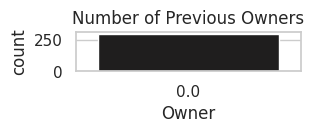

In [36]:
plt.subplot(8, 2, 8)
sns.countplot(data=df, x='Owner', palette='icefire')
plt.title('Number of Previous Owners')

/tmp/ipython-input-37-704526579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cars.values, y=top_cars.index, palette='coolwarm')


Text(0.5, 1.0, 'Top 10 Most Frequent Car Names')

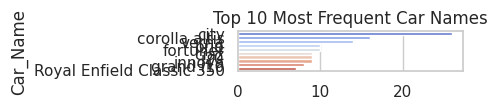

In [37]:
plt.subplot(8, 2, 9)
top_cars = df['Car_Name'].value_counts().nlargest(10)
sns.barplot(x=top_cars.values, y=top_cars.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Car Names')

/tmp/ipython-input-38-3415919578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price', palette='pastel')


Text(0.5, 1.0, 'Selling Price by Fuel Type')

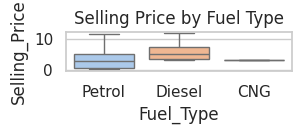

In [38]:
plt.subplot(8, 2, 10)
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price', palette='pastel')
plt.title('Selling Price by Fuel Type')

/tmp/ipython-input-39-465752926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission', y='Selling_Price', palette='Set2')


Text(0.5, 1.0, 'Selling Price by Transmission Type')

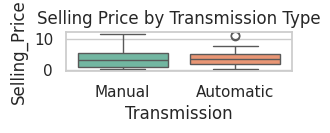

In [39]:
plt.subplot(8, 2, 11)
sns.boxplot(data=df, x='Transmission', y='Selling_Price', palette='Set2')
plt.title('Selling Price by Transmission Type')

Text(0.5, 1.0, 'Selling vs Present Price by Fuel Type')

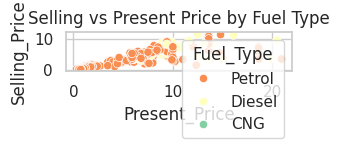

In [40]:
plt.subplot(8, 2, 12)
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', hue='Fuel_Type', palette='Spectral')
plt.title('Selling vs Present Price by Fuel Type')

Text(0.5, 1.0, 'Correlation Heatmap')

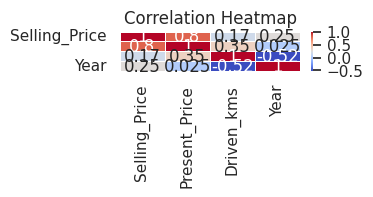

In [41]:
# 13. Correlation Heatmap
plt.subplot(8, 2, 13)
corr = df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

/tmp/ipython-input-42-2857084498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Owner', y='Selling_Price', palette='GnBu')


Text(0.5, 1.0, 'Selling Price by Owner')

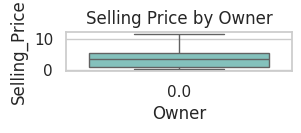

In [42]:
plt.subplot(8, 2, 14)
sns.boxplot(data=df, x='Owner', y='Selling_Price', palette='GnBu')
plt.title('Selling Price by Owner')

/tmp/ipython-input-43-3147759017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Selling_type', y='Selling_Price', palette='rocket')


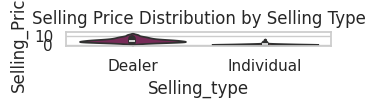

In [43]:
plt.subplot(8, 2, 15)
sns.violinplot(data=df, x='Selling_type', y='Selling_Price', palette='rocket')
plt.title('Selling Price Distribution by Selling Type')

plt.tight_layout()
plt.show()

# Data Transformation


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    float64
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    float64
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    float64
dtypes: float64(5), object(4)
memory usage: 31.5+ KB


In [45]:
categorical_columns = ["Car_Name","Selling_type","Fuel_Type","Transmission"]

label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    int64  
 1   Year           299 non-null    float64
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    float64
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 31.5 KB
None


# Delete Features

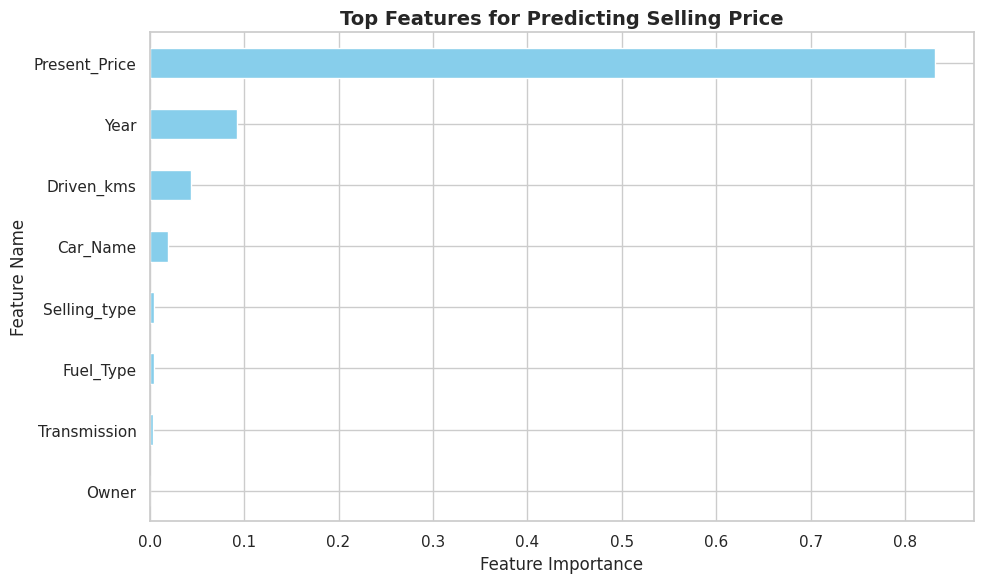

In [47]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [50]:
df.drop(["Selling_type","Fuel_Type","Transmission","Owner"],axis = 1 , inplace = True)

In [51]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms
0,90,2014.0,3.35,5.59,27000.0
1,93,2013.0,4.75,9.54,43000.0
2,68,2017.0,7.25,9.85,6900.0
3,96,2011.0,2.85,4.15,5200.0
4,92,2014.0,4.60,6.87,42450.0
...,...,...,...,...,...
296,69,2016.0,9.50,11.60,33988.0
297,66,2015.0,4.00,5.90,60000.0
298,69,2009.0,3.35,11.00,87934.0
299,69,2017.0,11.50,12.50,9000.0


# Create Model


In [103]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44,
                                                    shuffle=True)

In [105]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

0.6303939366645013
0.7545860684025021


In [106]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(model2.score(X_test, y_test))
print(model2.score(X_train, y_train))

0.7676379771569991
1.0


In [107]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(model3.score(X_test, y_test))
print(model3.score(X_train, y_train))

0.8287619688099868
0.9780419085650085


In [108]:
model4 = SVR()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(model4.score(X_test, y_test))
print(model4.score(X_train, y_train))

-0.33840977955040197
-0.01001128762656811


In [109]:
model5 = Lasso()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(model5.score(X_test, y_test))
print(model5.score(X_train, y_train))

0.615639912022293
0.720606458978422


In [110]:
model6 = XGBRegressor()
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
print(model6.score(X_test, y_test))
print(model6.score(X_train, y_train))

0.8102756830352171
0.9999976562190819


In [128]:
model7 = CatBoostRegressor(
    iterations = 200,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=10,
    loss_function='RMSE',
    verbose=3,
    random_seed=42
)

model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print("Test score:", model7.score(X_test, y_test))
print("Train score:", model7.score(X_train, y_train))

0:	learn: 2.7578671	total: 1.36ms	remaining: 270ms
3:	learn: 2.5722853	total: 5.81ms	remaining: 285ms
6:	learn: 2.3984498	total: 16ms	remaining: 441ms
9:	learn: 2.2280304	total: 31.3ms	remaining: 594ms
12:	learn: 2.0827121	total: 40.3ms	remaining: 580ms
15:	learn: 1.9552283	total: 47.6ms	remaining: 548ms
18:	learn: 1.8425174	total: 67ms	remaining: 639ms
21:	learn: 1.7465024	total: 74.3ms	remaining: 601ms
24:	learn: 1.6637819	total: 77.8ms	remaining: 545ms
27:	learn: 1.5807957	total: 80.4ms	remaining: 494ms
30:	learn: 1.5127803	total: 105ms	remaining: 575ms
33:	learn: 1.4510824	total: 115ms	remaining: 563ms
36:	learn: 1.4022384	total: 122ms	remaining: 537ms
39:	learn: 1.3508646	total: 124ms	remaining: 497ms
42:	learn: 1.3058917	total: 137ms	remaining: 499ms
45:	learn: 1.2711693	total: 143ms	remaining: 479ms
48:	learn: 1.2323168	total: 145ms	remaining: 447ms
51:	learn: 1.2008481	total: 157ms	remaining: 448ms
54:	learn: 1.1605438	total: 159ms	remaining: 420ms
57:	learn: 1.1367010	total: 1

# Metrics

In [129]:
med_abs_error = median_absolute_error(y_test, y_pred7)
mse = mean_squared_error(y_test, y_pred7)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred7)
r2 = r2_score(y_test, y_pred7)

print("="*40)
print("📊 Model Evaluation Metrics")
print("="*40)
print(f"Median Absolute Error  : {med_abs_error:.2f}")
print(f"Mean Absolute Error    : {mae:.2f}")
print(f"Mean Squared Error     : {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score               : {r2:.4f}")
print("="*40)

📊 Model Evaluation Metrics
Median Absolute Error  : 0.46
Mean Absolute Error    : 0.78
Mean Squared Error     : 1.43
Root Mean Squared Error: 1.20
R² Score               : 0.8323


# Save Model

In [132]:
import pickle

with open("Model car price prediction", "wb") as f:

    pickle.dump(model7, f)